# Model learning strategies

The model optimisation requires 
1. Method to evaluate the quality of a current model
1. A strategy for improving the model one step better

Usually the model quality is evaluated by means of a Loss function and optional regularization term. The loss function shows how large error the model makes in prediction and the regularization term shows how complex the model is. The purpose of the optimization is to minimize both the prediction error and complexity of the model. Too complex model may cause overfitting, and therefore regularization is important. 

Let $f()$ be the scoring function which estimates the prediction $\hat y = f(x_i)$. 

## Minimization of the Error function
The general strategy of the model optimisation is then to minimize the regularized training error,  $E$, which includes both prediction losses and reqularization term:

$$
 E(w,b) = \frac{1}{n} \sum_{i=1}^N L\left( y_i, f(x_i) \right) + \alpha R(w)
$$

The regularization coefficient, $\alpha$, determines the tradeoff between model complexity and prediction accuracy.

## Loss functions

The model leads to different models depending on the loss functions selected and the regularization used. For example the minimization of the error function using $L_2$ norm without regularization leads to OLS regression model, and with $L_2$ regularization to ridge regression model. 

For example, consider the following two dimensional regression problem: 

 $$\hat y = w_1 x_1 + w_2  x_2 + b $$

The $L_2$ loss function for the problem is:
$$L=(y-\hat y)^2 = (y - f(x))^2$$

Without regularization, the loss function can be directly used as error function, and it's minimization leads to 
Linear regression model. By adding $L_2$ regularization, it leads to ridge regression model, which can both be solved with closed form solutions, but the model can also be found by iterative optimization.  

The optimization methods, such as gradient descent method, can be applied indentically to many other loss functions than $L_2$-norm, providing and interesting general framework for developing many kinds of machine learning models. The model type will be different when it is optimised with different loss functions and different regularization terms are used.

  

The most often used loss functions and their relation to the model types are shown in the following table:

| Name        | Loss function | Type |
| :----        | :---- | :--- |
| Hinge loss  |  $$L(y_i, f(x_i) = max\left(0,1-y_i f(x_i)\right)$$ | Support vector Classification | 
| Perceptron  |  $$L(y_i, f(x_i) = max\left(0,-y_i f(x_i)\right)$$ | ANN |
| Huber       | $$L(y_i, f(x_i) = \epsilon |y_i-f(x_i)|-\frac{1}{2} \epsilon^2$$| Robust regression |
| Modified Huber | $$L(y_i, f(x_i) = max\left(0,1-y_i f(x_i)\right)^2, ...$$ | Classification |
| Log         | $$L(y_i, f(x_i) = log\left(1+e^{-y_i f(x_i)}\right)$$| Logistic regression | 
| Squared error| $$L(y_i, f(x_i) = \frac{1}{2} \left(y_i,-f(x_i)\right)^2$$| OLS, Ridge or Lasso | 
| Epsilon insensitive | $$L(y_i, f(x_i) = max\left(0, |y_i,-f(x_i)|-\epsilon\right)$$| Support Vector Regression | 

This means that one common optimisation framework can implement many common machine learning solutions which are often trained with specialized program code. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [65]:
hinge = lambda yh, y:  np.maximum(0, 1-y*yh)
perceptron = lambda yh, y: np.maximum(0, -y*yh)
huber = lambda yh, y, delta=1: [ 1/2*(error)**2 if error<delta else error-delta/2 for error in abs(yh-y)]
mhuber = lambda yh, y:  np.maximum(0, 1-y*yh)**2
logreg = lambda yh, y: np.log(1+np.exp(-y*yh))
l2norm = lambda yh, y: 1/2 * (y-yh)**2
l1norm = lambda yh, y: np.abs(y-yh)
epsilon= lambda yh, y, e=1.35: np.maximum(0, np.abs(y-yh)-e)
tukey=lambda yh, y, c=3: [ ((error)**2)/2 - (error**4)/(2*c**2) + (error**6)/(6*c**4) if error<c else c**2/6 for error in abs(yh-y)]

lossfunctions={'C: Hinge': hinge, 
               'C: Perceptron' : perceptron, 
               'C: Modified Huber': mhuber,
               'C: Logistic' : logreg, 
               'R: Huber': huber, 
               'R: Squared error' : l2norm, 
               'R: Absolute error' : l1norm, 
               'R: Epsilon insensitive' : epsilon,
               'R: Tukey' : tukey}

In [66]:
yh=np.linspace(-5,5,100)

def test(y=0, loss='L2'):
    global yh, lossfunctions
    loss = lossfunctions[loss](yh, y)
    plt.figure()
    plt.plot(yh, loss)
    plt.axvline(0, linestyle='--')
    
interact(test, y=[1, -1], loss=lossfunctions.keys())

interactive(children=(Dropdown(description='y', options=(1, -1), value=1), Dropdown(description='loss', option…

<function __main__.test(y=0, loss='L2')>

In [67]:
def plotall():
    fig, (axc, axr) = plt.subplots(1,2,figsize=(14,5))
    for lfname in lossfunctions:
        if lfname.startswith('C'):
            ax=axc
            y=1
        else:
            ax=axr
            y=0
        loss=lossfunctions[lfname](yh,y)
        ax.plot(yh, loss, label=lfname)
    axc.legend()
    axr.legend()
    axc.set_ylim(-1,10)
    axr.set_ylim(-1,10)
    axc.set_xlabel(r'$\hat y$')
    axr.set_xlabel(r'$\hat y$')
    axc.set_title('Loss functions for classification')
    axr.set_title('Loss functions for regression')
    axc.plot([1,1], [-0.5,0.5], 'k:')
    axr.plot([0,0], [-0.5,0.5], 'k:')
    

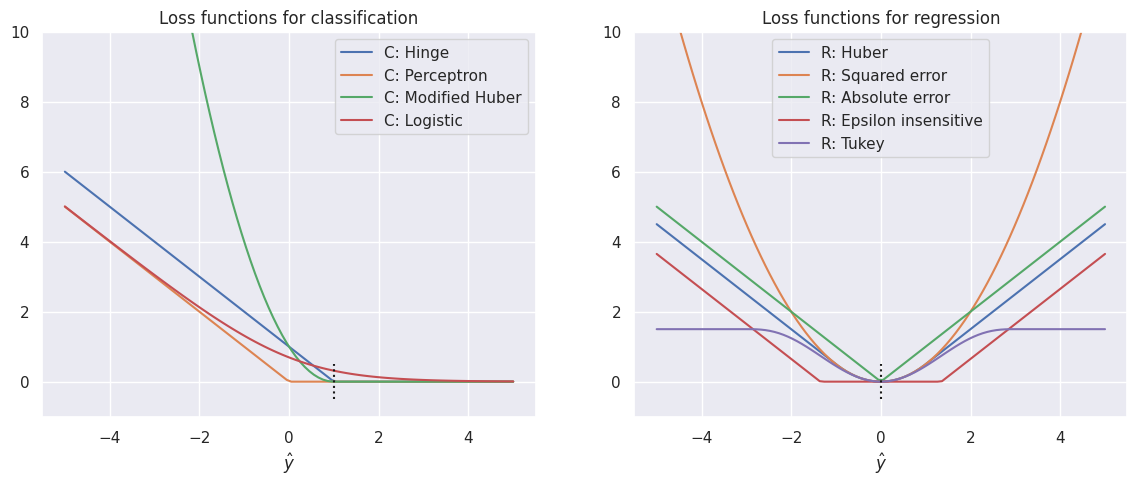

In [68]:
plotall()

# Gradient descent
The Gradient descent is a common optimisation strategy, where the minimal value of the scoring function $f(x)$ is found by calculating the partial derivatives of $f()$ by all of its parameters, and updating the model parameters towards the negative gradient. 

Gradient descent calculates the gradient using all samples in the training set, which may be rather resource intensive. 



# Stochastic gradient descent (SGD)

The utilize computational resources more efficiently, the gradient descent method can be modified so that it calculates the gradient and updates the model for every individual sample in the training set. This method provides only noisy estimate of the gradient, and the models is not advancing towards the minimum as directly as the gradient decent, but it usually converges faster than Gradient Descent. Due to this partly stochastic behaviour, this method is called as Stochastic Gradient Descent (SGD).

In SGD the learning of the model is made in the following steps:
1. The training data is shuffled in random order
2. Initial values for models parameters, e.g. $\beta_1, \beta_2$ and $\beta_0$ are set. They can be selected randomly or using some educated guess.
3. The training data is went through in random order performing the following actions for each sample
  1. Calculate the loss $L(\beta)$ of the prediction
  1. Calculate the complecity $R(\beta)$ of the prediction
  1. Update the parameters using the partial derivative of the error function by each model parameter $(\beta)$
4. When all samples are went through, reshuffle the data and run the next iteration. If the loss is below a threshold, stop the process and return the trained model

## The partial derivatives needed in the update step
The model parameters are updated using the partial derivatives. If the loss function is the L2 norm ( $(\hat y-y)^2/2$ ), and the learning rate $\eta \in ]0,1[$, the new values for $\beta_1, \beta_2$ and $\beta_0$ are calculated as follows:

$$ \beta_1 \leftarrow \beta_1 - \eta \frac{\partial L}{\partial \beta_1} 
= \beta_1 - \eta \frac{\partial L}{\partial \hat y} 
\cdot \frac{\partial \hat y}{\partial \beta_1} 
= \beta_1 - \eta \left((\hat y -y) \cdot x_1 \right) $$

$$ \beta_2 \leftarrow \beta_2 - \eta \frac{\partial L}{\partial \beta_2} 
= \beta_2 - \eta \frac{\partial L}{\partial \hat y} 
\cdot \frac{\partial \hat y}{\partial \beta_2} 
= \beta_2 - \eta \left((\hat y -y)\cdot x_2 \right) $$

$$ \beta_0 \leftarrow \beta_0 - \eta \frac{\partial L}{\partial \beta_0}
\cdot \frac{\partial \hat y}{\partial \beta_0} 
= \beta_0 - \eta \left((\hat y -y)\cdot 1 \right) $$

# Learning in Neural Networks

## The backpropagation algorithm
When using Stochastic Gradient Descent (**SGD**) training,  the weights, $w_i$, are updated towards the gradient (multidimensional derivative) or the loss function. 
$$
    w \leftarrow w - \eta \left(\alpha \frac{\partial R(w)}{\partial w} + \frac{\partial L(w)}{\partial w}\right),
$$

where $\eta$ is the learning rate, $\alpha$ is the regularization term (L2 penalty for exessive model complexity), $R$ is a function related to model complexity and $L$ is a loss function. The weights of the model are simply updated to the direction where the model loss is reduced and model complexity is reduced. 



Let us use the following perceptron as an example:

![Perceptron](kuvat/perceptron_sgd.svg)

- First the network predicts the output $\hat{y} = f(x)$ using the current weights $w$.
- This prediction is perhaps not accurate but has a prediction error $\hat y-y$.
- To make the network better, each coefficient $w$ will be modified to make the error smaller. To calculate the direction and magnitude of change, the partial derivative of the output by the specific weight is calculated

To update weight $w_1$, we'll calculate $\frac{\partial L}{\partial w_1}$. The chain rule can be used for the calculation. For simplicity, it is assumed that the regularization is not being used.

 $ S= \bf{w} \cdot \bf{x}$

Sigmoid:  $\partial a(x) / \partial x = x(1-x)$
$$
   \frac{\partial L}{\partial w_1} 
    = \frac{\partial L}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial S} \cdot \frac{\partial S}{\partial w_1}
    = \left(y-\hat y\right) \cdot \left( S(1-S) \right) \cdot \left( x_1 \right)
$$

Relu: $\partial a(x) / \partial x = 1$ (or 0 when $x \leq 0$
$$
   \frac{\partial L}{\partial w_1} 
    = \frac{\partial L}{\partial \hat y} \cdot \frac{\partial \hat y}{\partial S} \cdot \frac{\partial S}{\partial w_1}
    = \left(y-\hat y\right) \cdot \left( 1 \right) \cdot \left( x_1 \right) = 2 (y-\hat y) x_1
$$

To update the perceptron using ReLU towards negative gradient for a step $\eta$ requires that $w_1$ will be updated as follows:

$$
    w_1' = w_1 - \eta \cdot (y-\hat y) x_1
$$

If S is negative for a neuron using ReLU, the output and the derivative will be zero, and the neuron is not updated in this run.

## Mini-batch

A mini-batch approach is similar than SGD, but instead of calculating the gradient from only one sample at the time, the mini-batch approach is to calculate the gradient from a small batch of samples at the time.

# Example

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from snippets import plotDB, DisplaySupportVectors

from sklearn.linear_model import SGDRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score

## Gradient descent classifier example

Let's create a sample data set and implement a classifier for it. Let's put also the scaler in the pipeline- The SGD-classifier uses gradient descent to optimise the model until the given loss function is minimized. A regularization term can be also added to keep the model simple enough.

Accuracy training.. 0.944
Accuracy test...... 0.912


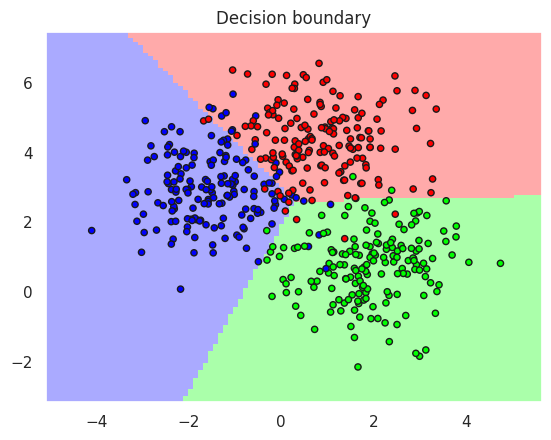

In [7]:
X,y=datasets.make_blobs(n_samples=500, centers=3, n_features=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

# Always scale the input. The most convenient way is to use a pipeline.
# Default values for the classifier are pretty good, but you can try to change them 
model = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3, loss='hinge', penalty='l2', alpha=0.005, random_state=0))
model.fit(X_train, y_train)
yh_train=model.predict(X_train)
yh_test=model.predict(X_test)

plotDB(model, X, y)

print("Accuracy training..", accuracy_score(y_train,yh_train))
print("Accuracy test......", accuracy_score(y_test,yh_test))

## Gradient descent regressor example

Let's load the data set of house prices, and try to predict that from the features using Gradient Descent Regressor.

In [8]:
housing = fetch_california_housing()
y=housing['target']
D=pd.DataFrame(data=housing['data'], columns=housing['feature_names'])
D.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [66]:
X_train, X_test, y_train, y_test = train_test_split(D,y, test_size=0.25, shuffle=True, random_state=0)
model = make_pipeline(StandardScaler(),
                    #SGDRegressor(max_iter=100, tol=1e-4, loss='huber', penalty='l2', alpha=0.03, random_state=0))
                    SGDRegressor(max_iter=100, tol=1e-4, loss='squared_error', penalty='l2', alpha=0.3, random_state=0))
%time model.fit(X_train, y_train)
print("Number of interations needed:", model[1].n_iter_)

# Cross_val_score and score are coefficient of determinations, R^2
RsquaredTR=model.score(X_train, y_train)
RSquaredTE=model.score(X_test, y_test)
RSquaredTA=model.score(D,y)

RsquaredTR, RSquaredTE, RSquaredTA

CPU times: user 11.5 ms, sys: 0 ns, total: 11.5 ms
Wall time: 11.2 ms
Number of interations needed: 13


(0.5151568673443967, 0.4857430955956292, 0.5078939207429067)


Training score..... 0.5151568673443967
CV score........... 0.4461703234114811
Testing score...... 0.4857430955956292
All samples score.. 0.5078939207429067


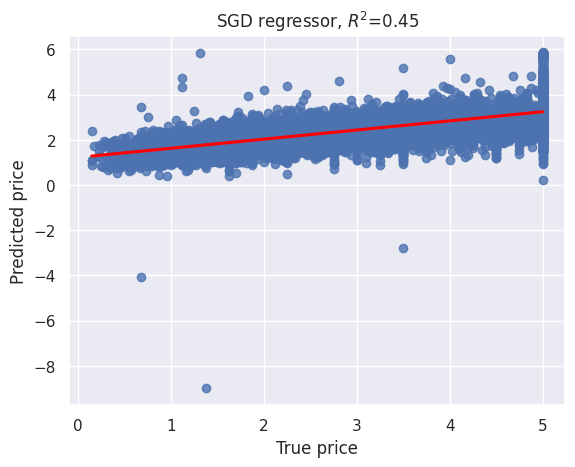

In [67]:
sns.regplot(x=y,y=model.predict(D), line_kws={"color": "red"})
RsquaredCV=cross_val_score(model, D, y, cv=5).mean()

plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.title('SGD regressor, $R^2$=%3.2f' % RsquaredCV)

print("")
print("Training score.....", RsquaredTR)
print("CV score...........", RsquaredCV)
print("Testing score......", RSquaredTE)
print("All samples score..", RSquaredTA)

## Partial learning

The SGD modules can be also trained step by step

In [91]:
# Step by step

reg = SGDRegressor(max_iter=1000, tol=1e-4, loss='squared_error', alpha=0.4, penalty='l2', random_state=0)
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train)
X_te = scaler.fit_transform(X_test)
scores_tr=[]
scores_te=[]

for i in range(20):
    reg.partial_fit(X_tr, y_train)
    scores_tr.append(reg.score(X_tr, y_train))
    scores_te.append(reg.score(X_te, y_test))

19 0.5021660173140929 0.4829140464573626


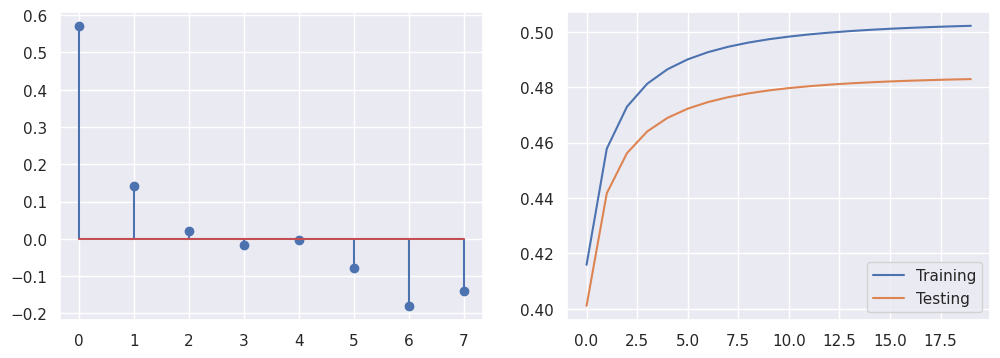

In [92]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(12,4))
ax1.stem(reg.coef_)
print(i, reg.score(X_tr, y_train), reg.score(X_te, y_test))

ax2.plot(scores_tr, label='Training')
ax2.plot(scores_te, label='Testing')
ax2.legend()